In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/datasets/6Soybean.csv')
df.head()


Mounted at /content/drive


,Class,date,plant.stand,precip,temp,hail,crop.hist,area.dam,sever,seed.tmt,...,int.discolor,sclerotia,fruit.pods,fruit.spots,seed,mold.growth,seed.discolor,seed.size,shriveling,roots
0,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
columns = df.columns
df[['Class']] = df[['Class']].apply(LabelEncoder().fit_transform)
df.head

<bound method NDFrame.head of      Class  date  plant.stand  precip  temp  hail  crop.hist  area.dam  sever  \
0       10   6.0          0.0     2.0   1.0   0.0        1.0       1.0    1.0   
1       10   4.0          0.0     2.0   1.0   0.0        2.0       0.0    2.0   
2       10   3.0          0.0     2.0   1.0   0.0        1.0       0.0    2.0   
3       10   3.0          0.0     2.0   1.0   0.0        1.0       0.0    2.0   
4       10   6.0          0.0     2.0   1.0   0.0        2.0       0.0    1.0   
..     ...   ...          ...     ...   ...   ...        ...       ...    ...   
678      0   0.0          0.0     2.0   1.0   0.0        2.0       2.0    1.0   
679     13   0.0          1.0     2.0   0.0   0.0        0.0       0.0    1.0   
680     13   2.0          1.0     2.0   0.0   0.0        0.0       0.0    1.0   
681     13   0.0          1.0     2.0   0.0   0.0        1.0       3.0    1.0   
682     13   2.0          1.0     2.0   0.0   0.0        1.0       3.0    1.0  

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(df)
df = imp.transform(df)
df = pd.DataFrame(df, columns = columns)
print(df)

     Class  date  plant.stand  precip  temp  hail  crop.hist  area.dam  sever  \
0     10.0   6.0          0.0     2.0   1.0   0.0        1.0       1.0    1.0   
1     10.0   4.0          0.0     2.0   1.0   0.0        2.0       0.0    2.0   
2     10.0   3.0          0.0     2.0   1.0   0.0        1.0       0.0    2.0   
3     10.0   3.0          0.0     2.0   1.0   0.0        1.0       0.0    2.0   
4     10.0   6.0          0.0     2.0   1.0   0.0        2.0       0.0    1.0   
..     ...   ...          ...     ...   ...   ...        ...       ...    ...   
678    0.0   0.0          0.0     2.0   1.0   0.0        2.0       2.0    1.0   
679   13.0   0.0          1.0     2.0   0.0   0.0        0.0       0.0    1.0   
680   13.0   2.0          1.0     2.0   0.0   0.0        0.0       0.0    1.0   
681   13.0   0.0          1.0     2.0   0.0   0.0        1.0       3.0    1.0   
682   13.0   2.0          1.0     2.0   0.0   0.0        1.0       3.0    1.0   

     seed.tmt  ...  int.dis

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [ ]:
X_train = df_train.iloc[:, :-1]
X_test = df_test.iloc[:, :-1]
y_train = df_train.iloc[:, -1:]
y_test = df_test.iloc[:, -1:]

In [ ]:
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)


DecisionTreeClassifier()

[Text(0.5, 0.9285714285714286, 'x[11] <= 0.5\ngini = 0.244\nsamples = 457\nvalue = [394, 51, 12]'),
 Text(0.23076923076923078, 0.7857142857142857, 'x[15] <= 0.5\ngini = 0.031\nsamples = 320\nvalue = [315, 4, 1]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[2] <= 0.5\ngini = 0.279\nsamples = 31\nvalue = [26, 4, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 23\nvalue = [23, 0, 0]'),
 Text(0.23076923076923078, 0.5, 'x[0] <= 3.5\ngini = 0.594\nsamples = 8\nvalue = [3, 4, 1]'),
 Text(0.15384615384615385, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.3076923076923077, 0.35714285714285715, 'x[4] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.23076923076923078, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.38461538461538464, 0.21428571428571427, 'x[6] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.3076923076923077, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),


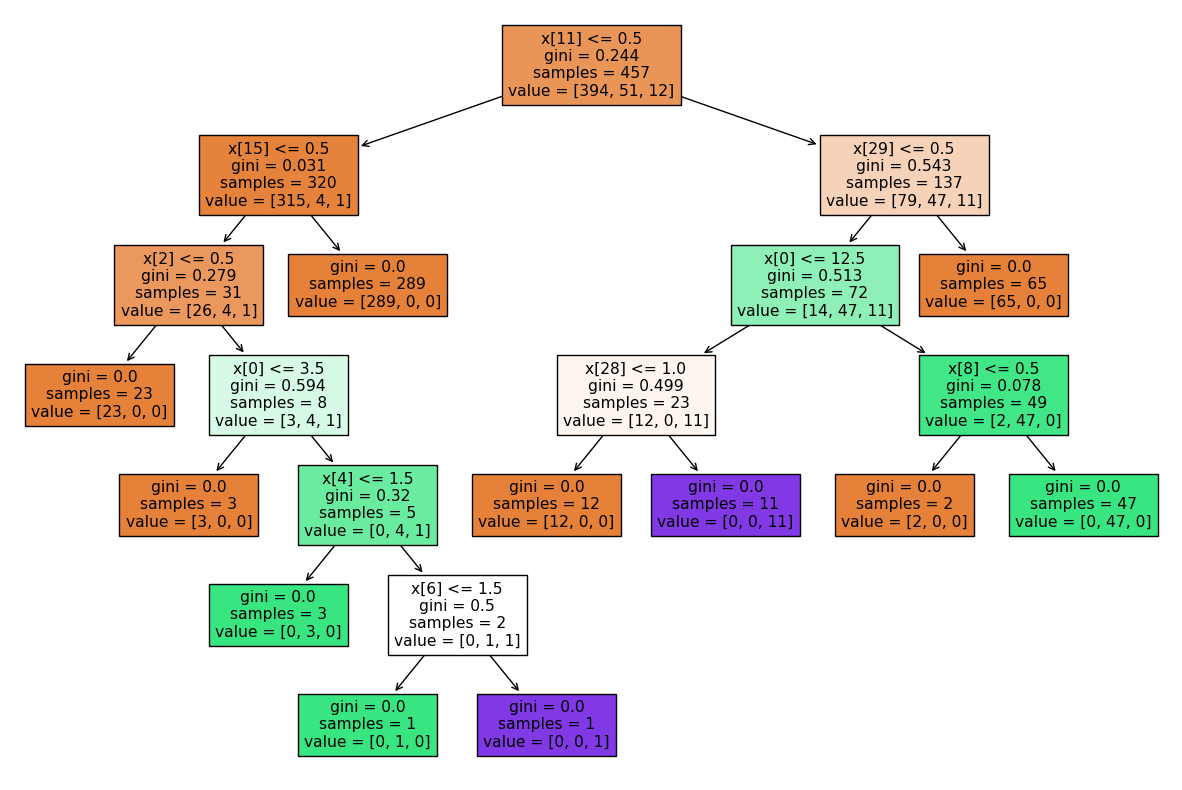

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred=treemodel.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred,y_test):.6f}')

accuracy: 0.986726


# Default Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       189
         1.0       0.94      0.97      0.96        34
         2.0       1.00      1.00      1.00         3

    accuracy                           0.99       226
   macro avg       0.98      0.99      0.98       226
weighted avg       0.99      0.99      0.99       226



In [ ]:
treemodel_post_pruning = DecisionTreeClassifier(max_depth=4)
treemodel_post_pruning.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
treemodel_post_pruning.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'x[11] <= 0.5\ngini = 0.244\nsamples = 457\nvalue = [394, 51, 12]'),
 Text(0.23076923076923078, 0.7, 'x[15] <= 0.5\ngini = 0.031\nsamples = 320\nvalue = [315, 4, 1]'),
 Text(0.15384615384615385, 0.5, 'x[2] <= 0.5\ngini = 0.279\nsamples = 31\nvalue = [26, 4, 1]'),
 Text(0.07692307692307693, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [23, 0, 0]'),
 Text(0.23076923076923078, 0.3, 'x[0] <= 3.5\ngini = 0.594\nsamples = 8\nvalue = [3, 4, 1]'),
 Text(0.15384615384615385, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.3076923076923077, 0.1, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.3076923076923077, 0.5, 'gini = 0.0\nsamples = 289\nvalue = [289, 0, 0]'),
 Text(0.7692307692307693, 0.7, 'x[29] <= 0.5\ngini = 0.543\nsamples = 137\nvalue = [79, 47, 11]'),
 Text(0.6923076923076923, 0.5, 'x[0] <= 12.5\ngini = 0.513\nsamples = 72\nvalue = [14, 47, 11]'),
 Text(0.5384615384615384, 0.3, 'x[28] <= 1.0\ngini = 0.499\nsamples = 23\nvalue = [12, 0, 11]'),
 Text(0.461

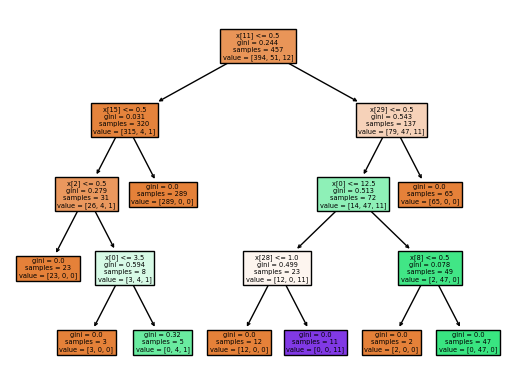

In [ ]:
tree.plot_tree(treemodel_post_pruning,filled=True)


In [ ]:
y_pred_post_pruning =treemodel_post_pruning.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_post_pruning,y_test):.6f}')


accuracy: 0.986726


# Post Pruning Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred_post_pruning,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       189
         1.0       0.94      0.97      0.96        34
         2.0       1.00      1.00      1.00         3

    accuracy                           0.99       226
   macro avg       0.98      0.99      0.98       226
weighted avg       0.99      0.99      0.99       226



In [ ]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8],
  'max_features':['auto', 'sqrt', 'log2']

}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
treemodel_pre_pruninig=DecisionTreeClassifier()
cv=GridSearchCV(treemodel_pre_pruninig,param_grid=parameter,cv=5,scoring='accuracy')


In [ ]:
cv.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'random'}

In [ ]:
y_pred_pre_pruning=cv.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_pre_pruning,y_test):.6f}')

accuracy: 0.938053


# PrePruning Decision Tree Report

In [ ]:
print(classification_report(y_pred_pre_pruning,y_test))


              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       186
         1.0       0.83      0.91      0.87        32
         2.0       1.00      0.38      0.55         8

    accuracy                           0.94       226
   macro avg       0.93      0.75      0.79       226
weighted avg       0.94      0.94      0.93       226



In [ ]:
treemodel_cost_complexity=DecisionTreeClassifier()
path = treemodel_cost_complexity.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
ccp_alphas

array([0.        , 0.00175055, 0.00603118, 0.00839548, 0.02511654,
       0.04726843, 0.07059422])

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.07059422018619516


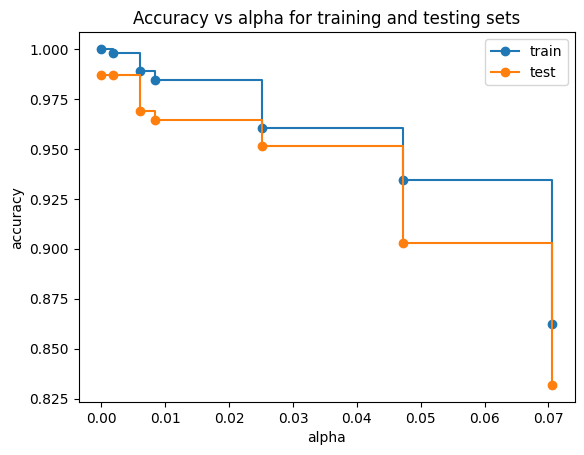

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
treemodel_cost_complexity = DecisionTreeClassifier(random_state=0, ccp_alpha=0.005)
treemodel_cost_complexity.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.005, random_state=0)

[Text(0.5, 0.9, 'x[11] <= 0.5\ngini = 0.244\nsamples = 457\nvalue = [394, 51, 12]'),
 Text(0.23076923076923078, 0.7, 'x[15] <= 0.5\ngini = 0.031\nsamples = 320\nvalue = [315, 4, 1]'),
 Text(0.15384615384615385, 0.5, 'x[2] <= 0.5\ngini = 0.279\nsamples = 31\nvalue = [26, 4, 1]'),
 Text(0.07692307692307693, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [23, 0, 0]'),
 Text(0.23076923076923078, 0.3, 'x[0] <= 3.5\ngini = 0.594\nsamples = 8\nvalue = [3, 4, 1]'),
 Text(0.15384615384615385, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.3076923076923077, 0.1, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.3076923076923077, 0.5, 'gini = 0.0\nsamples = 289\nvalue = [289, 0, 0]'),
 Text(0.7692307692307693, 0.7, 'x[29] <= 0.5\ngini = 0.543\nsamples = 137\nvalue = [79, 47, 11]'),
 Text(0.6923076923076923, 0.5, 'x[0] <= 12.5\ngini = 0.513\nsamples = 72\nvalue = [14, 47, 11]'),
 Text(0.5384615384615384, 0.3, 'x[28] <= 1.0\ngini = 0.499\nsamples = 23\nvalue = [12, 0, 11]'),
 Text(0.461

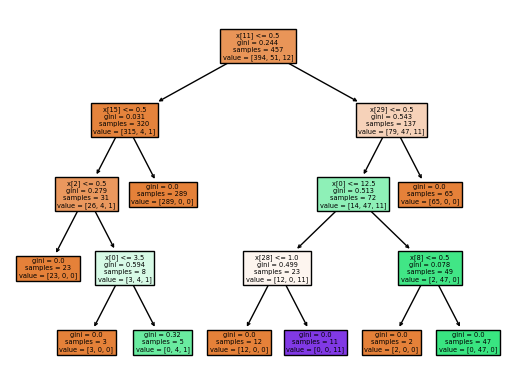

In [ ]:
tree.plot_tree(treemodel_cost_complexity,filled=True)

In [ ]:
y_pred_cost_complexity=treemodel_cost_complexity.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred_cost_complexity,y_test):.6f}')


accuracy: 0.986726


# Cost Complexity Decision Tree Report

In [ ]:
print(classification_report(y_pred_cost_complexity,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       189
         1.0       0.94      0.97      0.96        34
         2.0       1.00      1.00      1.00         3

    accuracy                           0.99       226
   macro avg       0.98      0.99      0.98       226
weighted avg       0.99      0.99      0.99       226



In [ ]:
pip install chefboost

In [ ]:
from chefboost.training import Training

def findGain(threshold, d, column):
  idx = d[d[column] <= threshold].index
  tmp_d = d.copy()
  tmp_d[column] = '>' + str(threshold)
  tmp_d.loc[idx, column] = '<=' + str(threshold)
  config = {'algorithm': 'CART'}
  gain = Training.findGains(tmp_d, config)['gains'][column]
  return gain

In [ ]:
def change_to_class(columns, decision):
  binary_selection = {}
  for column in columns:
    df_temp = df_train.copy()
    df_temp = df_temp[[column, decision]]
    df_temp.rename(columns={decision : "Decision"}, inplace=True)
    uniques_values = sorted(df_temp[column].unique())
    theresold, mx_gain = 0, 1
    for i in uniques_values:
      gain = findGain(i, df_temp, column)
      if (mx_gain > gain):
        theresold = i
        mx_gain = gain
    binary_selection[column] = theresold
  return binary_selection
    # idx = classified_df[classified_df[column] <= mx_theresold].index
    # classified_df[column] = '>' + str(mx_theresold)
    # classified_df.loc[idx, column] = '<=' + str(mx_theresold)

In [ ]:
print(df_train)

     Class  date  plant.stand  precip  temp  hail  crop.hist  area.dam  sever  \
257     12   5.0          0.0     2.0   2.0   0.0        2.0       2.0    0.0   
9       10   4.0          0.0     2.0   1.0   0.0        2.0       0.0    2.0   
22      18   3.0          0.0     2.0   0.0   1.0        3.0       1.0    2.0   
605     12   5.0          0.0     1.0   1.0   1.0        0.0       1.0    0.0   
221      1   4.0          1.0     2.0   1.0   0.0        3.0       0.0    1.0   
..     ...   ...          ...     ...   ...   ...        ...       ...    ...   
71       6   4.0          0.0     0.0   1.0   0.0        1.0       3.0    1.0   
106     11   2.0          1.0     2.0   1.0   0.0        2.0       0.0    1.0   
270     12   3.0          0.0     2.0   1.0   0.0        1.0       2.0    1.0   
435      5   2.0          0.0     2.0   1.0   0.0        3.0       3.0    1.0   
102     11   1.0          0.0     2.0   1.0   1.0        3.0       2.0    1.0   

     seed.tmt  ...  int.dis

In [ ]:
numerical_features = []
print(numerical_features)
binary_selection = change_to_class(numerical_features, 'roots')
print(binary_selection)

[]
{}


In [ ]:
class SelectRootDecisionTree():
  def __init__(self, criterion = "gini", max_depth = 20):
    self.criterion = criterion
    self.max_depth = max_depth

  def fit(self, X):
    self.X = X.copy();

  def predict(self, X_test):
    X_sub = {}
    DT_set = {}
    for feature in self.X.columns[0: -1]:
      X_sub[feature] = {}
      DT_set[feature] = {}
      if feature in numerical_features:
        X_sub[feature][0] = self.X[self.X[feature] < binary_selection[feature]].drop([feature], axis=1)
        X_sub[feature][1] = self.X[self.X[feature] >= binary_selection[feature]].drop([feature], axis=1)

        if 0 in list(X_sub[feature].keys()):
          if not X_sub[feature][0].empty:
            DT_set[feature][0] = DecisionTreeClassifier(max_depth = self.max_depth)
            Y_Sub = X_sub[feature][0].iloc[:,-1:]
            X_temp = X_sub[feature][0].iloc[:,:-1]
            DT_set[feature][0] = DT_set[feature][0].fit(X_temp, Y_Sub)
        if 1 in list(X_sub[feature].keys()):
          if not X_sub[feature][1].empty:
            DT_set[feature][1] = DecisionTreeClassifier(max_depth = self.max_depth)
            Y_Sub = X_sub[feature][1].iloc[:,-1:]
            X_temp = X_sub[feature][1].iloc[:,:-1]
            DT_set[feature][1] = DT_set[feature][1].fit(X_temp, Y_Sub)
      else:
        for label in np.unique(self.X[feature].values):
          X_sub[feature][label] = self.X[self.X[feature].eq(label)].drop([feature], axis=1)
          DT_set[feature][label] = DecisionTreeClassifier(max_depth = self.max_depth)
          Y_Sub = X_sub[feature][label].iloc[:,-1:]
          X_temp = X_sub[feature][label].iloc[:,:-1]
          DT_set[feature][label] = DT_set[feature][label].fit(X_temp, Y_Sub)

    predictions = []
    target = self.X.columns[-1:][0]
    # res = DT_set['Outlook'][1].predict(pd.DataFrame([row[1]],columns=X_test.columns).drop(['Outlook'], axis=1))

    for feature in X_test.columns:
      prediction = []
      for row in X_test.iterrows():
        label = row[1][feature]
        if feature in numerical_features:
          label = 1 if row[1][feature] >= binary_selection[feature] else 0
        if label not in list(X_sub[feature].keys()) or X_sub[feature][label].empty:
          prediction.append(0)
          continue;
        decisions = np.unique(X_sub[feature][label][target].values);
        if (len(decisions) == 1):
          prediction.append(decisions[0]);
          continue
        test_data = pd.DataFrame([row[1]],columns=X_test.columns).drop([feature], axis=1)
        res = DT_set[feature][label].predict(test_data)
        prediction.append(res[0])
      predictions.append(prediction)
    return predictions;
        # prediction.append()



In [ ]:
proposed_algo_1_dt = SelectRootDecisionTree(max_depth = 4)
proposed_algo_1_dt.fit(df_train)
print(X_test)
y_pred_proposed_algo_1 = proposed_algo_1_dt.predict(X_test)
print(y_pred_proposed_algo_1)

     Class  date  plant.stand  precip  temp  hail  crop.hist  area.dam  sever  \
292      9   5.0          0.0     2.0   2.0   0.0        3.0       3.0    1.0   
145      5   2.0          0.0     2.0   1.0   0.0        2.0       2.0    1.0   
211      1   4.0          0.0     1.0   1.0   0.0        3.0       3.0    1.0   
118      5   1.0          0.0     2.0   1.0   0.0        2.0       3.0    1.0   
302      0   5.0          0.0     2.0   1.0   0.0        2.0       1.0    1.0   
..     ...   ...          ...     ...   ...   ...        ...       ...    ...   
137      5   4.0          1.0     1.0   1.0   1.0        2.0       2.0    0.0   
340     15   1.0          1.0     2.0   1.0   1.0        2.0       3.0    1.0   
299      8   3.0          0.0     2.0   1.0   0.0        2.0       1.0    1.0   
33      15   1.0          1.0     2.0   0.0   0.0        2.0       1.0    2.0   
535     14   1.0          0.0     0.0   1.0   1.0        0.0       0.0    1.0   

     seed.tmt  ...  myceliu

In [ ]:
from sklearn.metrics import recall_score
mx_recal, proposed_algo_result = 0, []
for feature_pred in y_pred_proposed_algo_1:
  # print(y_test_proposed_algo_1)
  recall = recall_score(feature_pred, y_test, average='macro')
  if (recall > mx_recal):
    proposed_algo_result = feature_pred
    mx_recal = recall
print(mx_recal)

0.9964912280701754


In [ ]:
print(f'accuracy: {accuracy_score(proposed_algo_result, y_test):.6f}')

accuracy: 0.991150


In [ ]:
print(classification_report(proposed_algo_result, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       190
         1.0       0.94      1.00      0.97        33
         2.0       1.00      1.00      1.00         3

    accuracy                           0.99       226
   macro avg       0.98      1.00      0.99       226
weighted avg       0.99      0.99      0.99       226

